# Numerical Methods and Root-Finding Algorithms

This project explores various numerical methods to find roots of mathematical functions. Specifically, I implemented the Newton-Raphson, Bisection, and Secant methods to solve \( \cos(x) - x = 0 \). I compared their efficiency, accuracy, and convergence using Python.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import newton, bisect, root_scalar

## Define Functions

I defined the function \( f(x) = \cos(x) - x \) and its derivative for the Newton-Raphson method.

In [14]:
# Define the function for which we want to find roots
def f(x):
  return np.cos(x) - x

# Define its derivative for Newton-Raphson method
def df(x):
  return -np.sin(x) - 1

## Implement Root-Finding Algorithms

I used the Newton-Raphson method, the Bisection method, and the Secant method to find the roots of the function.

In [15]:
# Newton-Raphson method
root_newton = newton(f, x0=0.5, fprime=df)

# Bisection method
root_bisect = bisect(f, a=0, b=1)

# Secant method using scipy's root scalar
root_secant = root_scalar(f, method='secant', x0=0.5, x1=1.0).root

## Visualize the Results

I plotted the function \( f(x) \) and mark the roots found by the different methods.

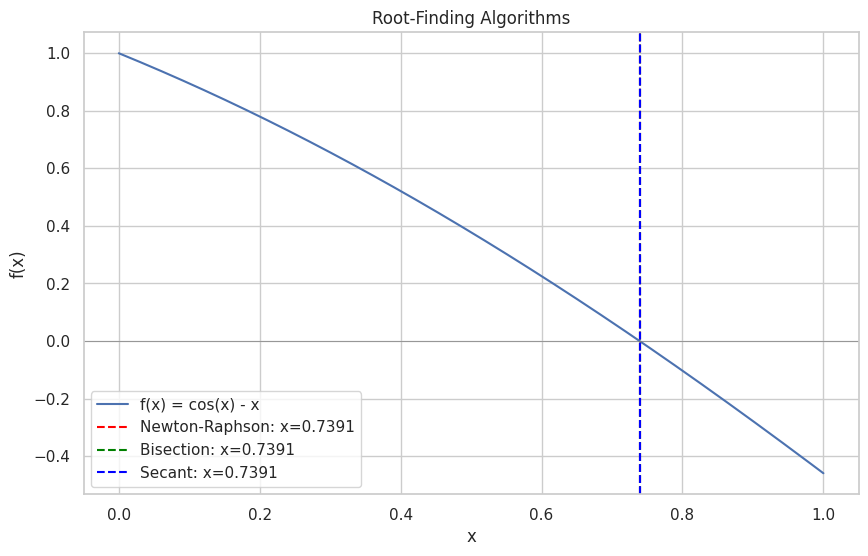

In [16]:
# Generate x values
x = np.linspace(0, 1, 400)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='f(x) = cos(x) - x')
plt.axhline(0, color='gray', lw=0.5)
plt.axvline(root_newton, color='red', linestyle='--', label=f'Newton-Raphson: x={root_newton:.4f}')
plt.axvline(root_bisect, color='green', linestyle='--', label=f'Bisection: x={root_bisect:.4f}')
plt.axvline(root_secant, color='blue', linestyle='--', label=f'Secant: x={root_secant:.4f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Root-Finding Algorithms')
plt.show()

## Newton-Raphson Convergence

I analyzed the convergence of the Newton-Raphson method.

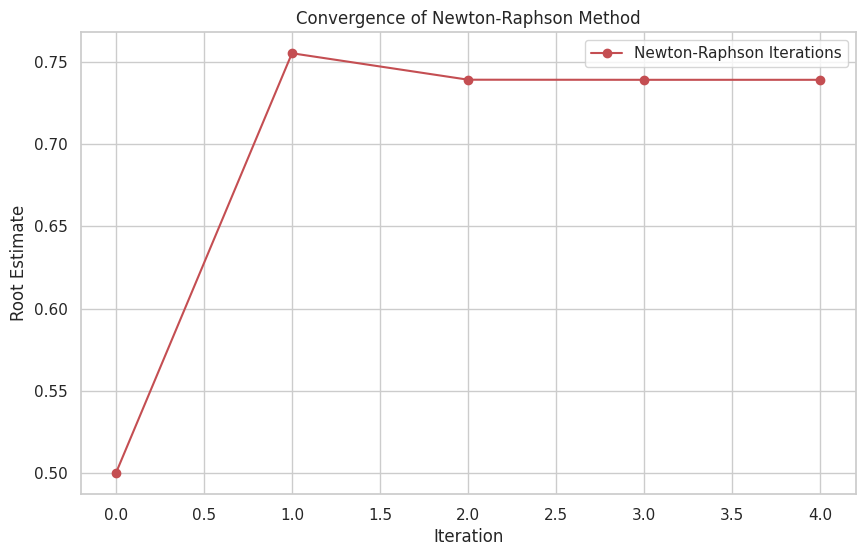

In [17]:
def newton_raphson(f, df, x0, tol=1e-6, max_iter=100):
    x = x0
    iterations = [x]
    for _ in range(max_iter):
        x_new = x - f(x)/df(x)
        iterations.append(x_new)
        if abs(x_new - x) < tol:
            break
        x = x_new
    return x, iterations

root_newton, newton_iterations = newton_raphson(f, df, 0.5)

plt.figure(figsize=(10, 6))
plt.plot(newton_iterations, 'ro-', label='Newton-Raphson Iterations')
plt.xlabel('Iteration')
plt.ylabel('Root Estimate')
plt.title('Convergence of Newton-Raphson Method')
plt.legend()
plt.show()

## Bisection Method Convergence

I analyzed the convergence of the Bisection method.

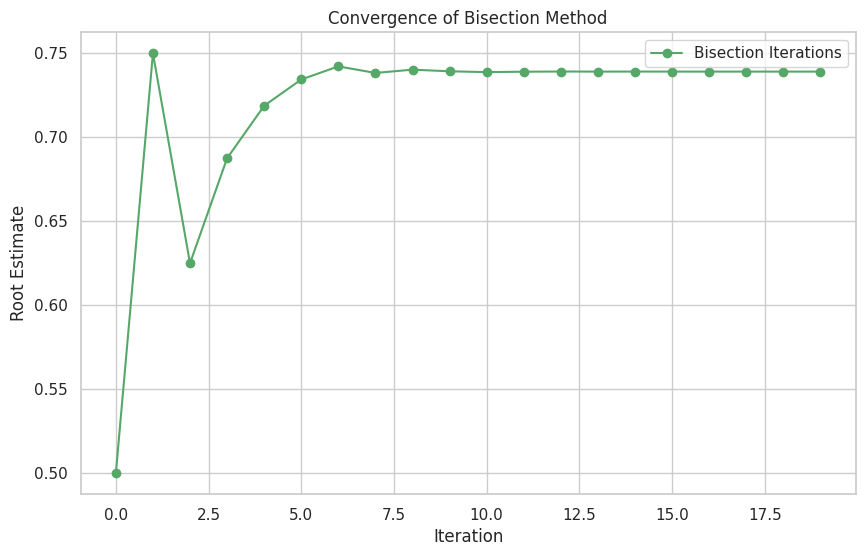

In [18]:
def bisection(f, a, b, tol=1e-6, max_iter=100):
    iterations = []
    for _ in range(max_iter):
        c = (a + b) / 2
        iterations.append(c)
        if f(c) == 0 or (b - a) / 2 < tol:
            return c, iterations
        if f(c) * f(a) > 0:
            a = c
        else:
            b = c
    return c, iterations

root_bisect, bisect_iterations = bisection(f, 0, 1)

plt.figure(figsize=(10, 6))
plt.plot(bisect_iterations, 'go-', label='Bisection Iterations')
plt.xlabel('Iteration')
plt.ylabel('Root Estimate')
plt.title('Convergence of Bisection Method')
plt.legend()
plt.show()

## Secant Method Convergence

I analyzed the convergence of the Secant method.

In [ ]:
def secant_method(f, x0, x1, tol=1e-6, max_iter=100):
    x_prev, x_curr = x0, x1
    iterations = [x_prev, x_curr]
    for _ in range(max_iter):
        x_next = x_curr - f(x_curr) * (x_curr - x_prev) / (f(x_curr) - f(x_prev))
        iterations.append(x_next)
        if abs(x_next - x_curr) < tol:
            break
        x_prev, x_curr = x_curr, x_next
    return x_next, iterations

root_secant, secant_iterations = secant_method(f, 0.5, 1.0)

plt.figure(figsize=(10, 6))
plt.plot(secant_iterations, 'bo-', label='Secant Iterations')
plt.xlabel('Iteration')
plt.ylabel('Root Estimate')
plt.title('Convergence of Secant Method')
plt.legend()
plt.show()

This project demonstrates the application of numerical methods in solving mathematical problems and provides insights into their performance and reliability.
